In [18]:
import pandas as pd
import numpy as np
import scipy
import scipy.misc
from PIL import Image
import imageio as iio
from pathlib import Path
import string
import glob
import os

In [2]:
############
###Labels###
#age: from 1 to 116
#gender: 0-male; 1-female
#race: 0-white; 1-black; 2-Asian; 3-Indian; 4-others(like Hispanic, Latino, Middle Eastern)
############

labels = pd.read_csv('./data/labels.csv', header = None)
labels = labels.values
print(labels.shape)
print(labels)

(23705, 3)
[[100   0   0]
 [100   0   0]
 [100   1   0]
 ...
 [  9   1   4]
 [  9   1   4]
 [  9   1   4]]


In [3]:
print("labels of ages: {}".format(np.unique(labels[:, 0])))
print("labels of genders: {}".format(np.unique(labels[:, 1])))
print("labels of races: {}".format(np.unique(labels[:, -1])))

labels of ages: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 103 105 110 111 115 116]
labels of genders: [0 1]
labels of races: [0 1 2 3 4]


In [19]:
# read images from Faces folder
images = list()

filelist = glob.glob('./data/Faces/*.jpg')
for file in sorted(filelist, key=lambda s: int(s.strip(string.ascii_letters + "./"))):
    im = iio.imread(file)
    images.append(im)
images = np.array(images)
print(images.shape)

(23705, 200, 200, 3)


# Display an image

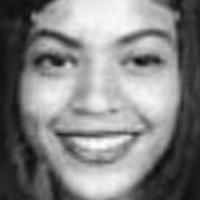

In [24]:
im_1 = images[1000, :, :, :]
Image.fromarray(im_1, 'RGB')

In [25]:
# reshape images into im_arr
im_arr = images.reshape(images.shape[0], -1)
im_arr.shape

(23705, 120000)

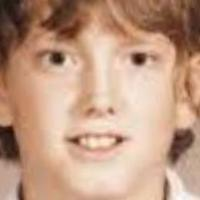

In [27]:
# transform im_arr back to images
images = im_arr.reshape(images.shape[0], images.shape[1], images.shape[2], images.shape[3])
im_1 = images[500, :, :, :]
Image.fromarray(im_1, 'RGB')

In [30]:
im_arr

array([[215, 206, 201, ...,  96,  95, 101],
       [118, 122, 133, ..., 140, 143, 148],
       [219, 223, 226, ..., 255, 255, 255],
       ...,
       [220, 210, 201, ...,   0,   0,   5],
       [  8,   8,   6, ...,  38,  46,  49],
       [251, 178, 146, ...,  32,  27,  21]], dtype=uint8)